In [1]:
import numpy as np
%matplotlib inline

abc_x_l
x_m
Abs(0.1*x_m - 0.1*abc_x_l + 1.1)
-0.0412276274369678*sin(6.28318530717959*Abs(0.1*x_m - 0.1*abc_x_l + 1.1)) + 0.25904082296183*Abs(0.1*x_m - 0.1*abc_x_l + 1.1)
abc_y_l
y_m
Abs(0.1*y_m - 0.1*abc_y_l + 1.1)
-0.0412276274369678*sin(6.28318530717959*Abs(0.1*y_m - 0.1*abc_y_l + 1.1)) + 0.25904082296183*Abs(0.1*y_m - 0.1*abc_y_l + 1.1)
[Inc(damp(abc_x_l, y), (-0.0412276274369678*sin(6.28318530717959*Abs(0.1*x_m - 0.1*abc_x_l + 1.1)) + 0.25904082296183*Abs(0.1*x_m - 0.1*abc_x_l + 1.1))/h_x), Inc(damp(abc_x_r, y), (-0.0412276274369678*sin(6.28318530717959*Abs(-0.1*x_M + 0.1*abc_x_r + 1.1)) + 0.25904082296183*Abs(-0.1*x_M + 0.1*abc_x_r + 1.1))/h_x), Inc(damp(x, abc_y_l), (-0.0412276274369678*sin(6.28318530717959*Abs(0.1*y_m - 0.1*abc_y_l + 1.1)) + 0.25904082296183*Abs(0.1*y_m - 0.1*abc_y_l + 1.1))/h_y), Inc(damp(x, abc_y_r), (-0.0412276274369678*sin(6.28318530717959*Abs(-0.1*y_M + 0.1*abc_y_r + 1.1)) + 0.25904082296183*Abs(-0.1*y_M + 0.1*abc_y_r + 1.1))/h_y)]


Operator `initdamp` run in 0.01 s


#define _POSIX_C_SOURCE 200809L
#include "stdlib.h"
#include "math.h"
#include "sys/time.h"

struct dataobj
{
  void *restrict data;
  int * size;
  int * npsize;
  int * dsize;
  int * hsize;
  int * hofs;
  int * oofs;
} ;

struct profiler
{
  double section0;
} ;


int initdamp(struct dataobj *restrict damp_vec, const float h_x, const float h_y, const int x_M, const int x_m, const int y_M, const int y_m, const int abc_x_l_ltkn, const int abc_x_r_rtkn, const int abc_y_l_ltkn, const int abc_y_r_rtkn, struct profiler * timers)
{
  float (*restrict damp)[damp_vec->size[1]] __attribute__ ((aligned (64))) = (float (*)[damp_vec->size[1]]) damp_vec->data;
  struct timeval start_section0, end_section0;
  gettimeofday(&start_section0, NULL);
  /* Begin section0 */
  for (int abc_x_l = x_m; abc_x_l <= abc_x_l_ltkn + x_m - 1; abc_x_l += 1)
  {
    for (int y = y_m; y <= y_M; y += 1)
    {
      damp[abc_x_l + 1][y + 1] += (-4.12276274369678e-2F*sin(6.28318530717959F*fabs(1.0e-1F*x_m - 1.0e-1F*a

Operator `padfunc` run in 0.01 s


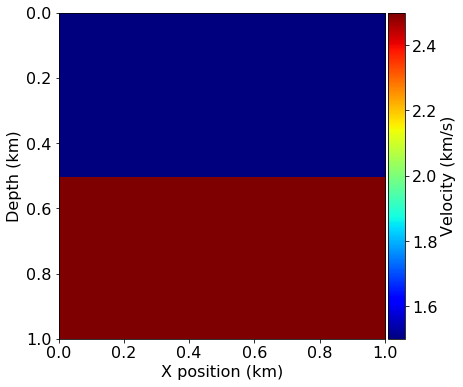

In [2]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import Model, plot_velocity

# Define a physical size
shape = (101, 101)  # Number of grid point (nx, nz)
spacing = (10., 10.)  # Grid spacing in m. The domain size is now 1km by 1km
origin = (0., 0.)  # What is the location of the top left corner. This is necessary to define
# the absolute location of the source and receivers

# Define a velocity profile. The velocity is in km/s
v = np.empty(shape, dtype=np.float32)
v[:, :51] = 1.5
v[:, 51:] = 2.5

# With the velocity and model size defined, we can create the seismic model that
# encapsulates this properties. We also define the size of the absorbing layer as 10 grid points
model = Model(vp=v, origin=origin, shape=shape, spacing=spacing,
              space_order=2, nbpml=10)

plot_velocity(model)

In [24]:
from examples.seismic import TimeAxis

t0 = 0.  # Simulation starts a t=0
tn = 1000.  # Simulation last 1 second (1000 ms)
dt = model.critical_dt  # Time step from model grid spacing
nreceivers=101

time_range = TimeAxis(start=t0, stop=tn, step=dt)

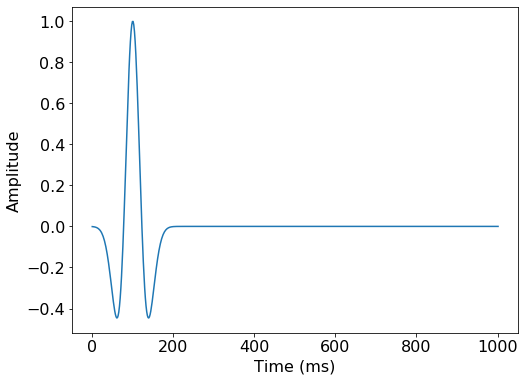

In [25]:
#NBVAL_IGNORE_OUTPUT
# Define acquisition geometry: source
from examples.seismic import AcquisitionGeometry

# First, position source centrally in all dimensions, then set depth
src_coordinates = np.empty((1, 2))
src_coordinates[0, :] = np.array(model.domain_size) * .5
src_coordinates[0, -1] = 20.  # Depth is 20m


# Define acquisition geometry: receivers

# Initialize receivers for synthetic and imaging data
rec_coordinates = np.empty((nreceivers, 2))
rec_coordinates[:, 0] = np.linspace(0, model.domain_size[0], num=nreceivers)
rec_coordinates[:, 1] = 30.

# Geometry

geometry = AcquisitionGeometry(model, rec_coordinates, src_coordinates, t0, tn, f0=.010, src_type='Ricker')
# We can plot the time signature to see the wavelet
geometry.src.show()

In [44]:
# Compute synthetic data with forward operator 
from examples.seismic.acoustic import AcousticWaveSolver

solver = AcousticWaveSolver(model, geometry, space_order=4)
# Create adjoint receiver symbol
srca = Receiver(name='srca', grid=solver.model.grid,time_range=solver.geometry.time_axis,
coordinates=solver.geometry.src_positions)

src_d , _, _ = solver.forward(vp=model.vp)

Operator `Forward` run in 0.08 s


In [45]:
srca_d , _, _ = solver.adjoint(rec=src_d,srca=srca,vp=model.vp)

Operator `Adjoint` run in 0.08 s


In [46]:
print(src.data.shape)
print(srca.data.shape)
print(src_d.data.shape)
print(srca_d.data.shape)

(597, 1)
(597, 1)
(597, 101)
(597, 1)


In [49]:
# Adjoint test: Verify <Ax,y> matches  <x, A^Ty> closely
from devito import norm
term1 = np.dot(srca.data.reshape(-1), solver.geometry.src.data)
term2 = norm(src_d) ** 2

In [50]:
print('<Ax,y>: %f, <x, A^Ty>: %f, difference: %4.4e, ratio: %f'
% (term1, term2, (term1 - term2)/term1, term1 / term2))

<Ax,y>: 161194.234375, <x, A^Ty>: 161176.578125, difference: 1.0953e-04, ratio: 1.000110


In [ ]:
assert np.isclose((term1 - term2)/term1, 0., atol=1.e-3)